<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Supervised Learning : Logistic Regression - Week 2</center></h1>


<center><img src="https://media.istockphoto.com/photos/loan-mortgage-picture-id1317735314?b=1&k=20&m=1317735314&s=170667a&w=0&h=FiRVPDobE5Svk7bff_GmgPQIfSCSwgkfgK5Bt-0Kx0w=" width="700" height="400"></center>

<center><font size=6>German Credit Case Study</font></center>

## Problem Statement

### Context

To minimize loss from the bank’s perspective, the bank needs a decision rule regarding whom to approve the loan and whom not to. An applicant’s demographic and socio-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application.
In this dataset, each entry represents a person who takes credit from a bank. Each person is classified as a good or bad credit risk according to the set of attributes.


### Objective:
The objective is to build a predictive model on this data to help the bank decide on whether to approve a loan to a prospective applicant.


### Dataset:
- Age (Numeric: Age in years)
- Sex (Categories: male, female)
- Saving accounts (Categories: little, moderate, quite rich, rich)
- Checking account (Categories: little, moderate, rich)
- Credit amount (Numeric: Amount of credit in DM - Deutsche Mark)
- Duration (Numeric: Duration for which the credit is given in months)
- Purpose (Categories: car, furniture/equipment,radio/TV, domestic appliances, repairs, education, business, vacation/others)
- Risk (0 - Person is not at risk, 1 - Person is at risk(defaulter))

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
data = pd.read_excel("German_Credit.xlsx")

## Data Overview

### View the first and last 5 rows of the dataset.

In [ ]:
data.head()

,Age,Sex,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
0,67,male,little,little,1169,6,0,radio/TV
1,22,female,little,moderate,5951,48,1,radio/TV
2,49,male,little,little,2096,12,0,education
3,45,male,little,little,7882,42,0,furniture/equipment
4,53,male,little,little,4870,24,1,car


In [ ]:
data.tail()

,Age,Sex,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose
995,31,female,little,little,1736,12,0,furniture/equipment
996,40,male,little,little,3857,30,0,car
997,38,male,little,little,804,12,0,radio/TV
998,23,male,little,little,1845,45,1,radio/TV
999,27,male,moderate,moderate,4576,45,0,car


-  The dataset contains information about different applicants.

### Understand the shape of the dataset.

In [ ]:
data.shape

(1000, 8)

* The dataset has 1000 rows and 9 columns

### Check the data types of the columns for the dataset.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Saving accounts   1000 non-null   object
 3   Checking account  1000 non-null   object
 4   Credit amount     1000 non-null   int64 
 5   Duration          1000 non-null   int64 
 6   Risk              1000 non-null   int64 
 7   Purpose           1000 non-null   object
dtypes: int64(4), object(4)
memory usage: 62.6+ KB


- There are total 8 columns and 1,000 observations in the dataset
- We have only three continuous variables - Age, Credit Amount, and Duration.
- All other variables are categorical
- We can see that there are no missing values in the dataset.

### Checking for duplicate values

In [ ]:
data.duplicated().sum()

0

- There are no duplicate values in the dataset.

### Checking for missing values

In [ ]:
data.isnull().sum()

Age                 0
Sex                 0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Risk                0
Purpose             0
dtype: int64

- There are no missing values in the dataset

### Statistical summary

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Risk,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0


**Observations**

- Mean value for the age column is approx 35 and the median is 33. This shows that majority of the customers are under 35 years of age.
- Mean amount of credit is approx 3,271 but it has a wide range with values from 250 to 18,424. We will explore this further in univariate analysis.
- Mean duration for which the credit is given is approx 21 months.

In [ ]:
# Making a list of all categorical variables
cat_col = [
    "Sex",
    "Saving accounts",
    "Checking account",
    "Purpose",
    "Risk",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Sex
male      690
female    310
Name: count, dtype: int64
----------------------------------------
Saving accounts
little        786
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64
----------------------------------------
Checking account
moderate    472
little      465
rich         63
Name: count, dtype: int64
----------------------------------------
Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64
----------------------------------------
Risk
0    700
1    300
Name: count, dtype: int64
----------------------------------------


- We have more male customers as compared to female customers
- We can see that the distribution of classes in the target variable is imbalanced i.e., only 30% observations with defaulters.
- Most of the customers are not at risk.

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>


### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

### Univariate analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observation on Age

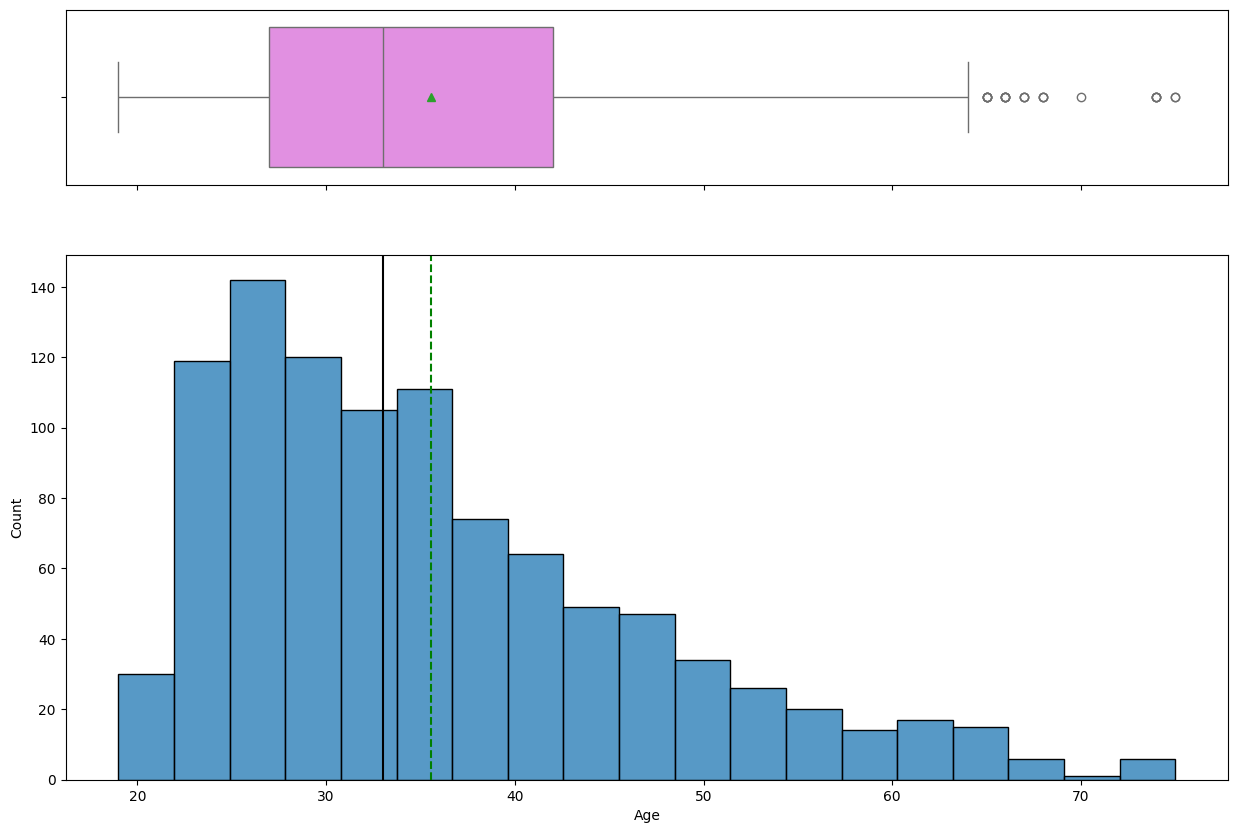

In [ ]:
histogram_boxplot(data, "Age")

- The distribution of age is right-skewed
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real market trend

#### Observation on Credit Amount

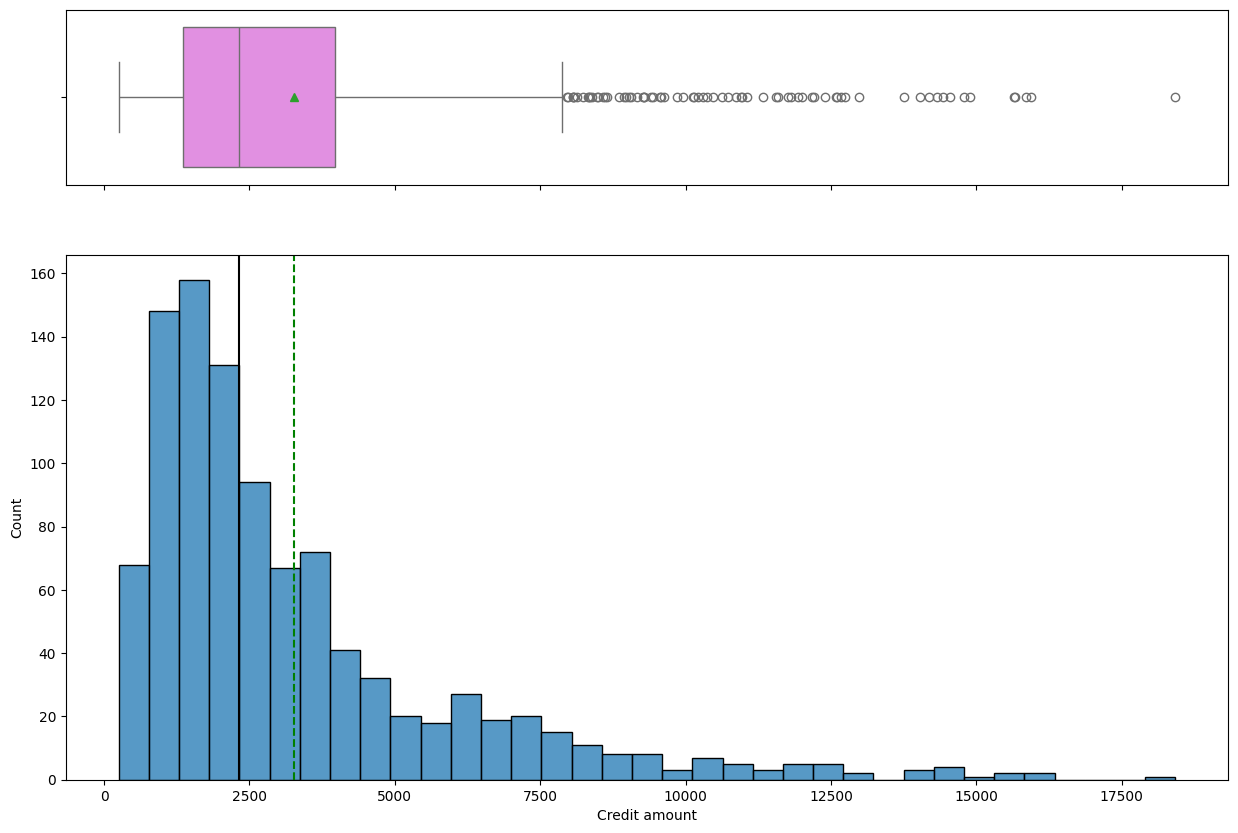

In [ ]:
histogram_boxplot(data, "Credit amount")

- The distribution of the credit amount is right-skewed
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real market trend

#### Observations on Risk

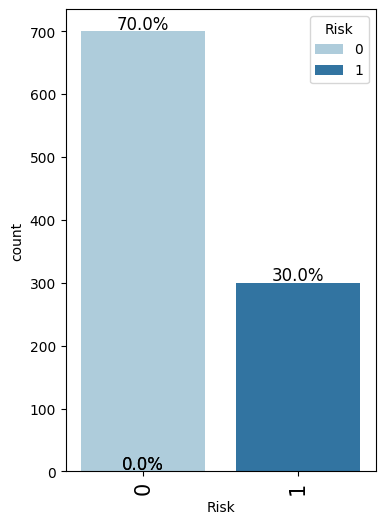

In [ ]:
labeled_barplot(data, "Risk", perc=True)

- As mentioned earlier, the class distribution in the target variable is imbalanced.
- We have 70% observations for non-defaulters and 30% observations for defaulters.

#### Observations on Sex of Customers

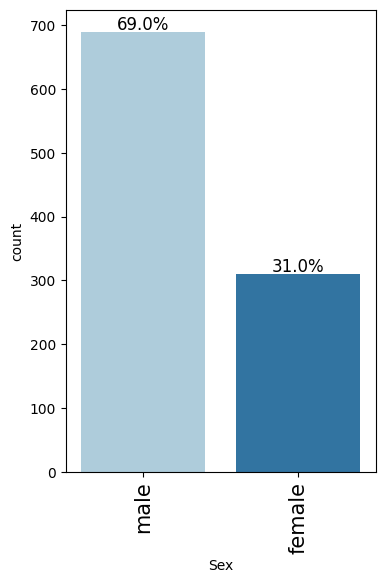

In [ ]:
labeled_barplot(data, "Sex", perc=True)

- Male customers are taking more credit than female customers
- There are 69% male customers and 31% female customers

#### Observations on Saving accounts

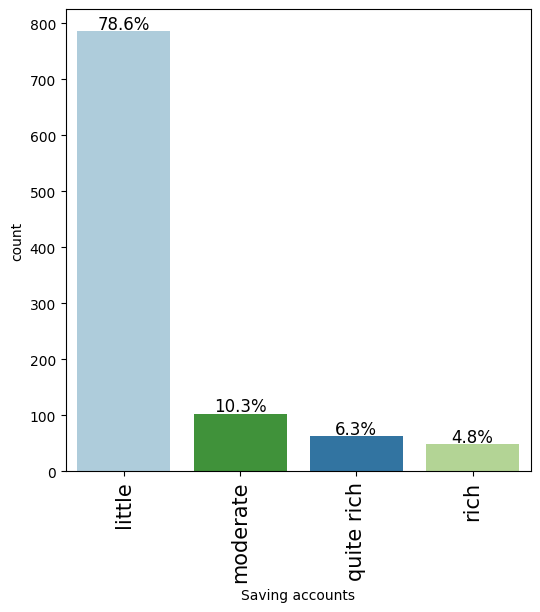

In [ ]:
labeled_barplot(data, "Saving accounts", perc=True)

- Approx 70% customers who take credit have a little or moderate amount in their savings account. This makes sense as these customers would need credit more than the other categories.
- Approx 11% customers who take credit are in the rich category based on their balance in the savings account.
- Note that the percentages do not add up to 100 as we have missing values in this column.

### Bivariate Analysis

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation Check

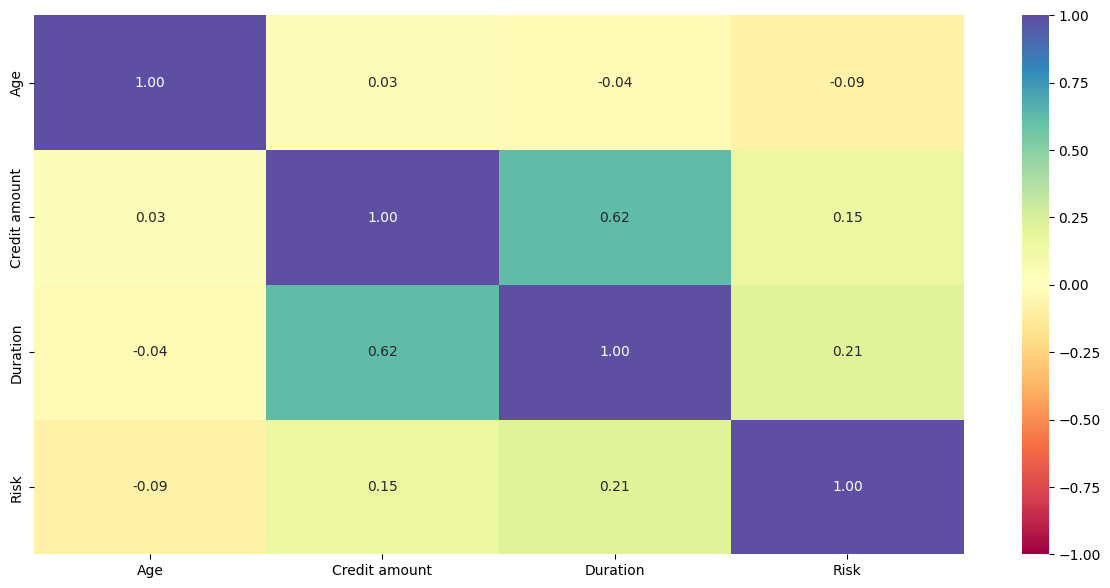

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Credit amount and duration have positive correlation which makes sense as customers might take the credit for longer duration if the amount of credit is high.
- Other variables have no significant correlation between them.

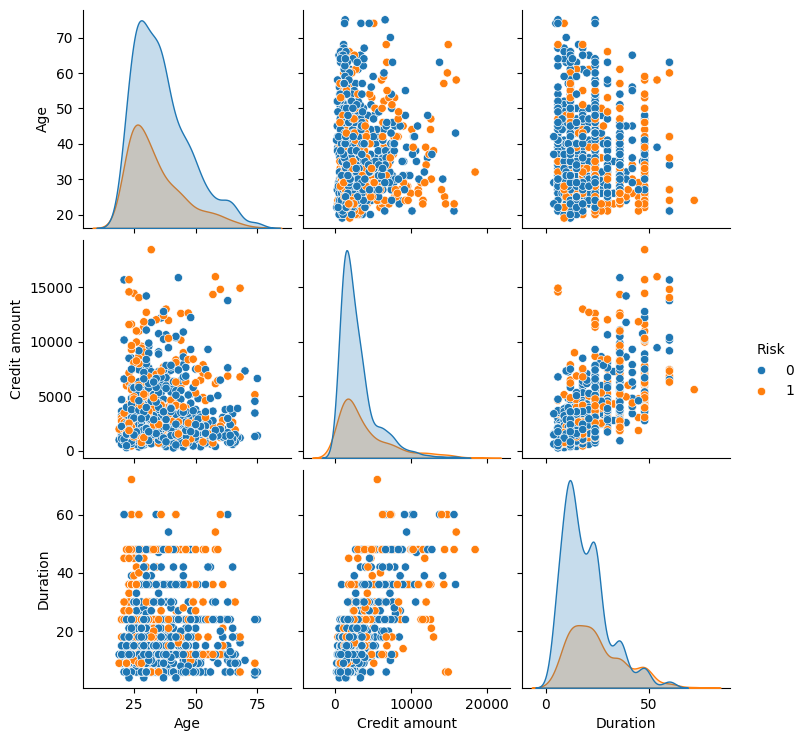

In [ ]:
sns.pairplot(data, hue="Risk")
plt.show()

- There are overlaps i.e., no clear distinction in the distribution of variables for people who have defaulted and did not default.
- Let's explore this further with the help of other plots.

#### Risk vs Credit amount

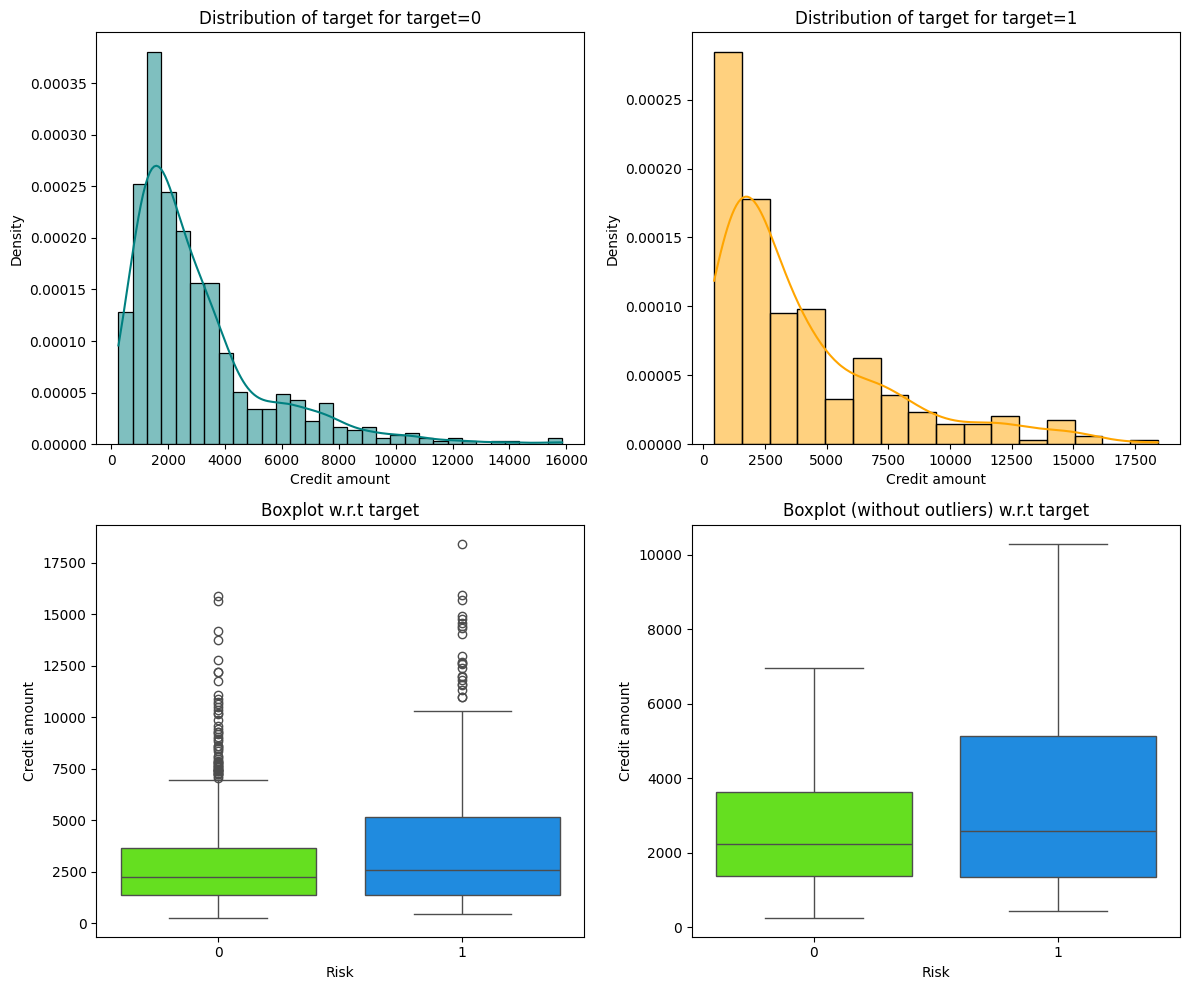

In [ ]:
distribution_plot_wrt_target(data, "Credit amount", "Risk")

- We can see that the third quartile amount of defaulters is much more than the third quartile amount of non-defaulters.
- This shows that customers with high credit amount are more likely to default.
- There are outliers in boxplots of both class distributions

#### Risk vs Duration

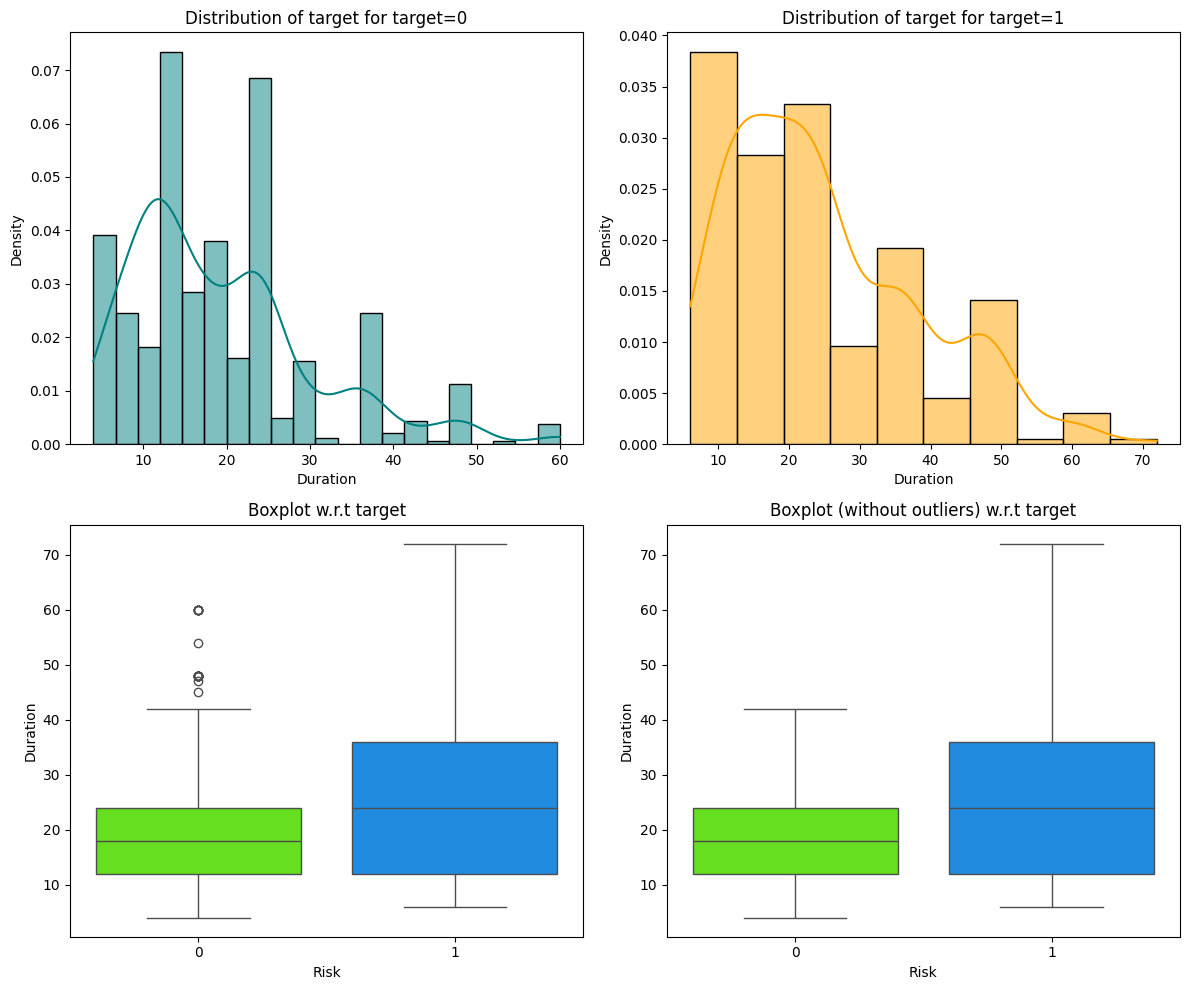

In [ ]:
distribution_plot_wrt_target(data, "Duration", "Risk")

- We can see that the second and third quartiles of duration of defaulters is much more than the second and third quartiles duration of non-defaulters.
- This shows that customers with high duration are more likely to default.

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

- The plot further confirms the findings of the previous plot.
- Customers with little amount in checking accounts are most likely to default as compared to customers with moderate amount, which in turn, are more likely as compared to the rich customers.

#### Risk vs Purpose

Risk                   0    1   All
Purpose                            
All                  700  300  1000
car                  231  106   337
radio/TV             218   62   280
furniture/equipment  123   58   181
business              63   34    97
education             36   23    59
repairs               14    8    22
vacation/others        7    5    12
domestic appliances    8    4    12
------------------------------------------------------------------------------------------------------------------------


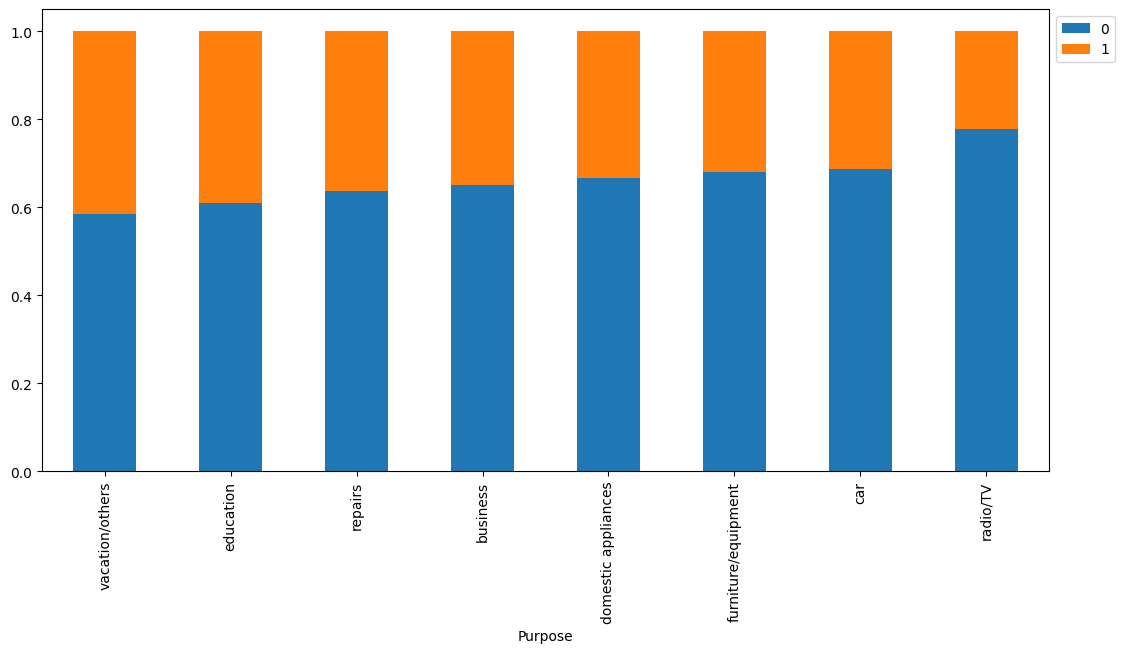

In [ ]:
stacked_barplot(data, "Purpose", "Risk")

- Customers who take credit for radio/TV are least likely to default. This might be because their credit amount is small.
- Customers who take credit for education or vacation are most likely to default.
- Other categories have no significant difference between their default and non-default ratio.

## Data Preprocessing

### Outlier Detection and Treatment

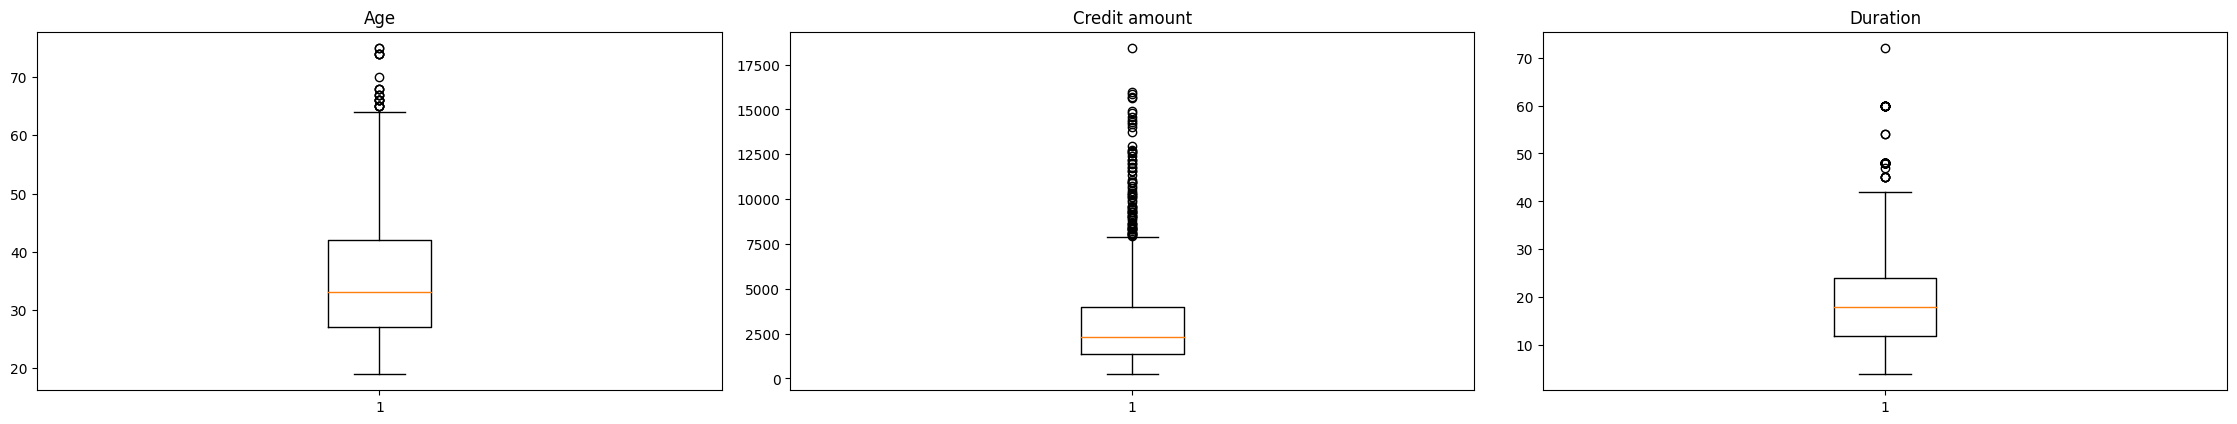

In [ ]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(30, 20))
numerical_col.remove("Risk")

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- We will not be treating the outliers since all are genuine values.

### Data Preparation

In [ ]:
# Converting monthly values to yearly
data["Duration"] = data["Duration"] / 12

In [ ]:
X = data.drop("Risk", axis=1)
Y = data["Risk"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# adding constant
#X = sm.add_constant(X)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)#, stratify=Y)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (700, 16)
Shape of test set :  (300, 16)
Percentage of classes in training set:
Risk
0    0.694286
1    0.305714
Name: proportion, dtype: float64
Percentage of classes in test set:
Risk
0    0.713333
1    0.286667
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**

1. Model predicted a non-defaulter as a defaulter - False Positive
2. Model predicted a defaulter as a non-defaulter - False Negative

**How to reduce this loss i.e need to reduce False Negatives?**

* Company would want to reduce false negatives, this can be done by maximizing the Recall. Greater the recall lesser the chances of false negatives.

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_statsmodels function will be used to check the model performance of models.
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_sklearn(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_sklearn(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    # checking which probabilities are greater than threshold
    pred_temp = (model.predict_proba(predictors))[:, 1] > threshold
    # rounding off the above values to get classes
    y_pred = np.round(pred_temp)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression

In [ ]:
# Fit the model on train
model = LogisticRegression(solver="newton-cg", random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='newton-cg')

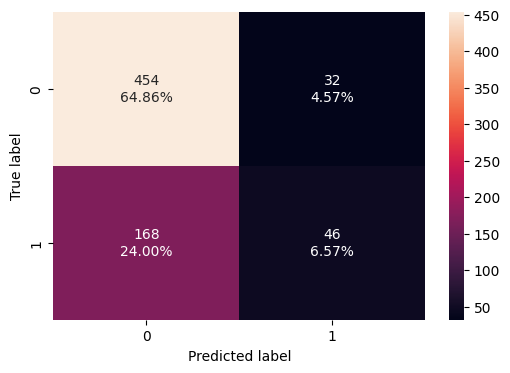

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf = model_performance_classification_sklearn(
    model, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.714286,0.214953,0.589744,0.315068


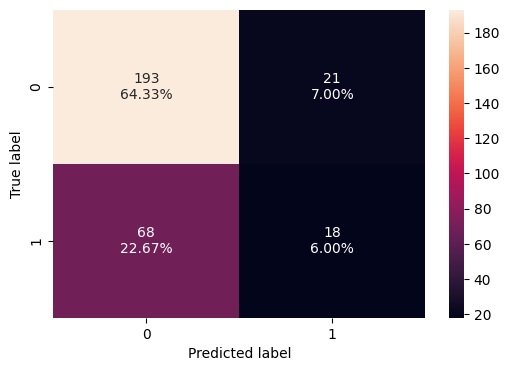

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf = model_performance_classification_sklearn(
    model, X_test, y_test
)
print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.703333,0.209302,0.461538,0.288


* The model has a low recall and a low precision on the training and test sets.
* However, the training and test recalls are close enough, indicating the model is not overfitting.

## Model Performance Improvement

* Let's see if the recall score can be improved further by changing the classification threshold.
* We'll try to arrive at the optimal threshold by checking two curves:
    - ROC curve
    - Precision-Recall curve

### Optimal Threshold from ROC curve

Let's first display the ROC curve and compute the ROC-AUC score.

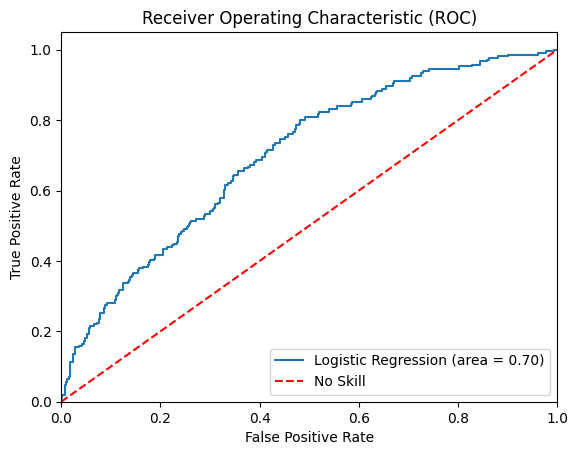

In [ ]:
logit_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--',label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# The optimal cut off would be where tpr is high and fpr is low
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.25487705137818945


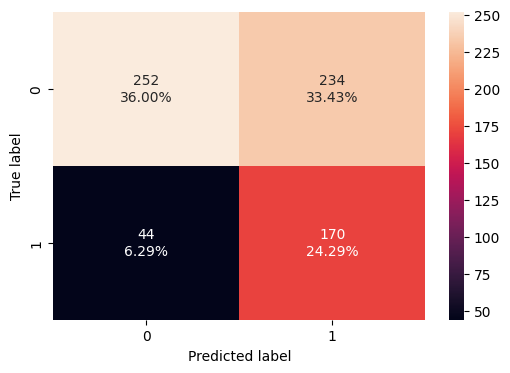

In [ ]:
# creating confusion matrix on training data
confusion_matrix_sklearn(
    model, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn(
    model, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.602857,0.794393,0.420792,0.550162


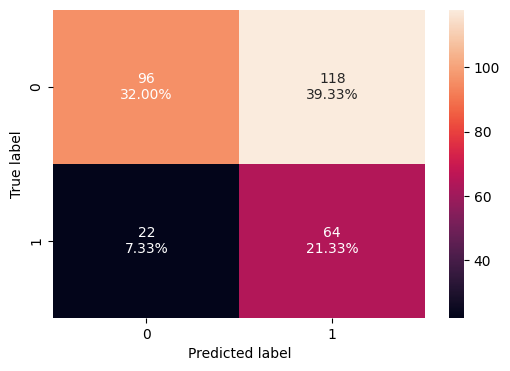

In [ ]:
# creating confusion matrix on testing data
confusion_matrix_sklearn(
    model, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn(
    model, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Testing performance:")
log_reg_model_test_perf_threshold_auc_roc

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.533333,0.744186,0.351648,0.477612


* Model performance has improved significantly.
* Model is giving a recall of 0.74 as compared to initial model which was giving a recall of 0.2.
* Precision, however, has decreased from 0.59 to 0.35.

### Optimal Threshold from Precision-Recall curve

Let's first display the Precision-Recall curve.

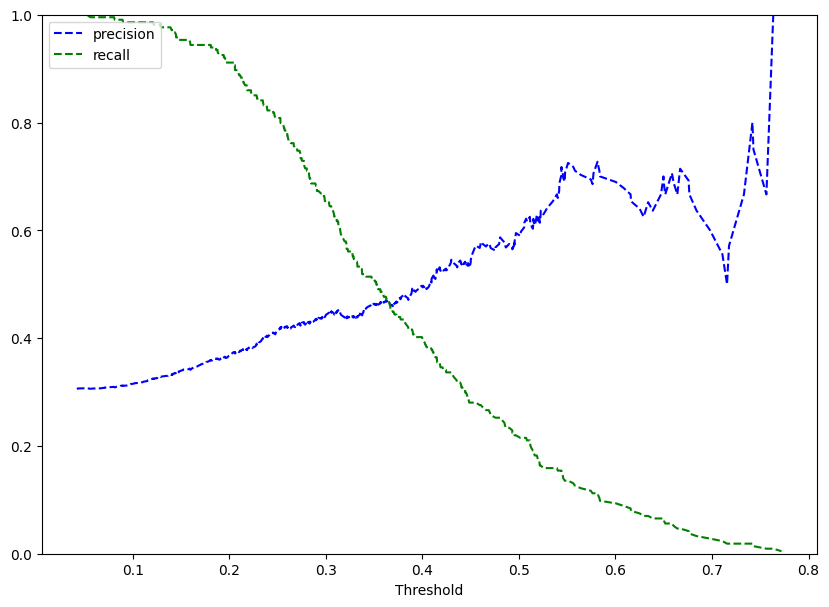

In [ ]:
y_scores = model.predict_proba(X_train)[:, 1]
prec, rec, thres = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_thres(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_thres(prec, rec, thres)
plt.show()

In [ ]:
# the optimal threshold will be the point where precision and recall are the same
# we first find the index where the precision and recall are the same
# then we find the threshold for the corresponding index
idx = np.where((rec == prec) == True)[0][0]
optimal_threshold_prec_rec = thres[idx]
print(optimal_threshold_prec_rec)

0.36554677264253826


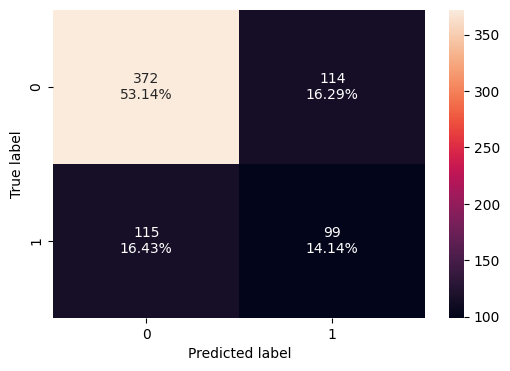

In [ ]:
# creating confusion matrix on training data
confusion_matrix_sklearn(model, X_train, y_train, threshold=optimal_threshold_prec_rec)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn(
    model, X_train, y_train, threshold=optimal_threshold_prec_rec
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.672857,0.462617,0.464789,0.4637


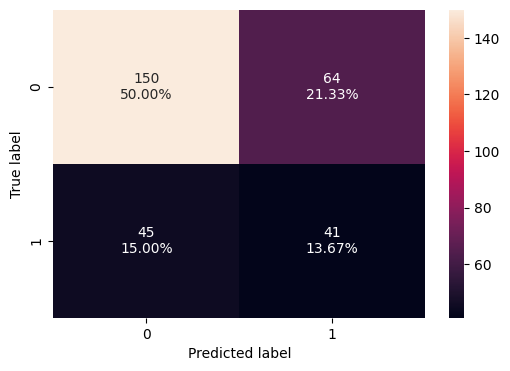

In [ ]:
# creating confusion matrix on testing data
confusion_matrix_sklearn(model, X_test, y_test, threshold=optimal_threshold_prec_rec)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn(
    model, X_test, y_test, threshold=optimal_threshold_prec_rec
)
print("Testing performance:")
log_reg_model_test_perf_threshold_curve

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.636667,0.476744,0.390476,0.429319


* Recall has improved as compared to the initial model.
* Model is giving a better performance with 0.25 threshold found using AUC-ROC curve.

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression - default threshold",
    "Logistic Regression - 0.25 threshold",
    "Logistic Regression - 0.36 threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression - default threshold,Logistic Regression - 0.25 threshold,Logistic Regression - 0.36 threshold
Accuracy,0.714286,0.602857,0.672857
Recall,0.214953,0.794393,0.462617
Precision,0.589744,0.420792,0.464789
F1,0.315068,0.550162,0.463700


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression - default threshold",
    "Logistic Regression - 0.25 threshold",
    "Logistic Regression - 0.36 threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression - default threshold,Logistic Regression - 0.25 threshold,Logistic Regression - 0.36 threshold
Accuracy,0.703333,0.533333,0.636667
Recall,0.209302,0.744186,0.476744
Precision,0.461538,0.351648,0.390476
F1,0.288000,0.477612,0.429319


- As our objective is to improve recall, we can use the logistic regression model with the optimal threshold of ~0.25 obtained from the ROC curve.

## Conclusions and Recommendations

- All the models are giving a generalized performance on training and test set.
- The highest recall is 79% on the training set.
- Using the model with 0.25 threshold the model will give a high recall but low precision scores - This model will help the bank identify potential customers effectively but the cost of resources will be high.
- The bank can also use the other models depending on their business goals
    - Using the model with default threshold the model will give a low recall but good precision scores - This model will help the bank save resources but lose on potential customers.
    - Using the model with 0.36 threshold the model will give a balance recall and precision score - This model will help the bank to maintain a balance in identifying potential customer and the cost of resources.

- Bank can target more male customers as they have lesser odds of defaulting.
- We saw in our analysis that customers with a little or moderate amount in saving or checking accounts are more likely to default.  The bank can be more strict with its rules or interest rates to compensate for the risk.
- Our analysis showed that younger customers are slightly more likely to default. The bank can alter its policies to deal with this.
- The observations are based on the data collected. The bank can collect more data to get a better perspective and build a more robust model.

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observation on Age

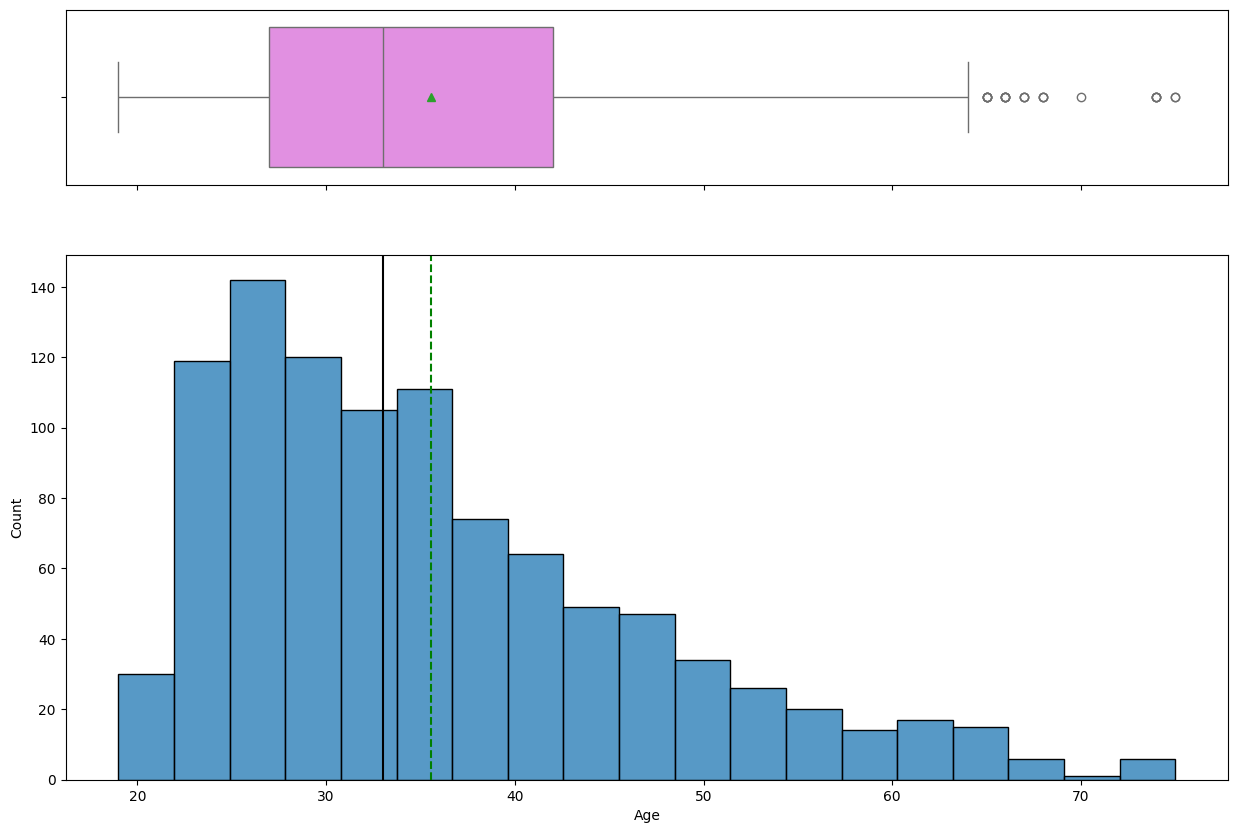

In [ ]:
histogram_boxplot(data, "Age")

- The distribution of age is right-skewed
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real market trend

#### Observation on Credit Amount

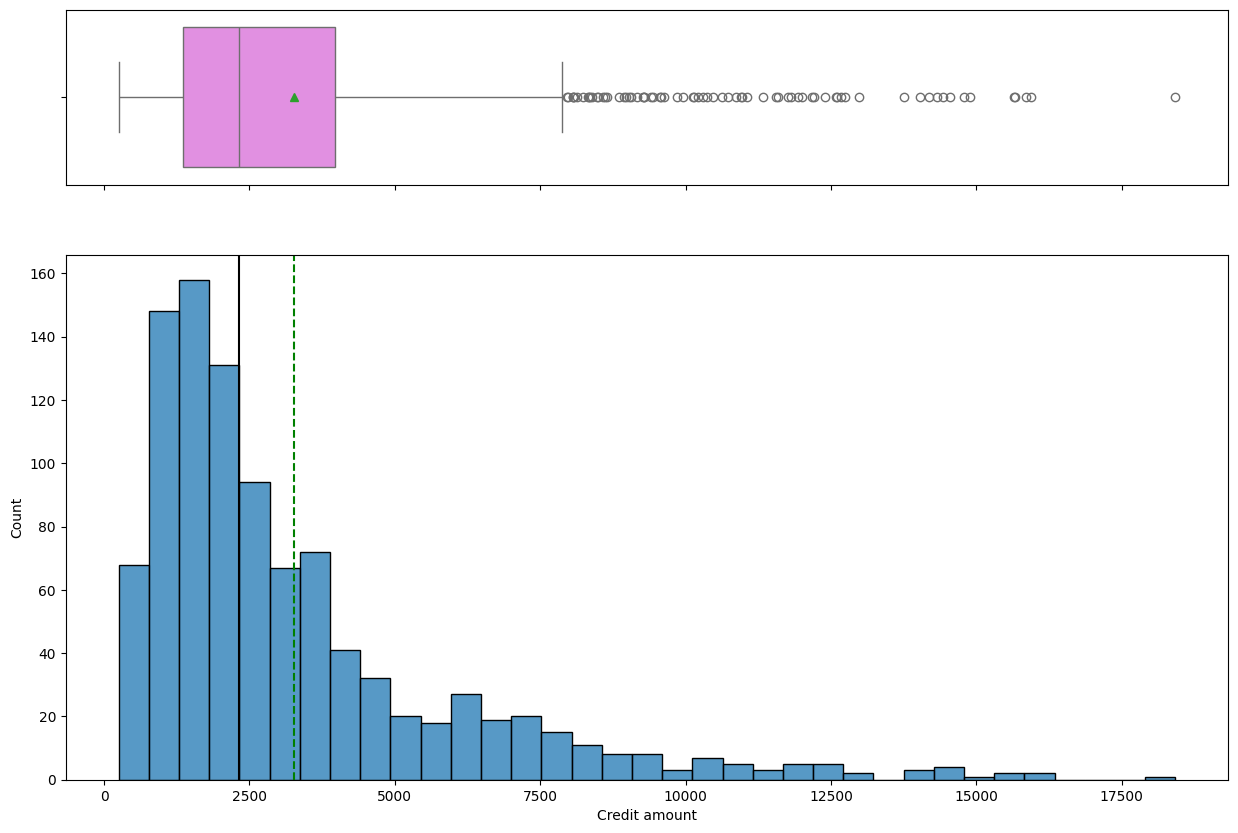

In [ ]:
histogram_boxplot(data, "Credit amount")

- The distribution of the credit amount is right-skewed
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real market trend

#### Observations on Duration

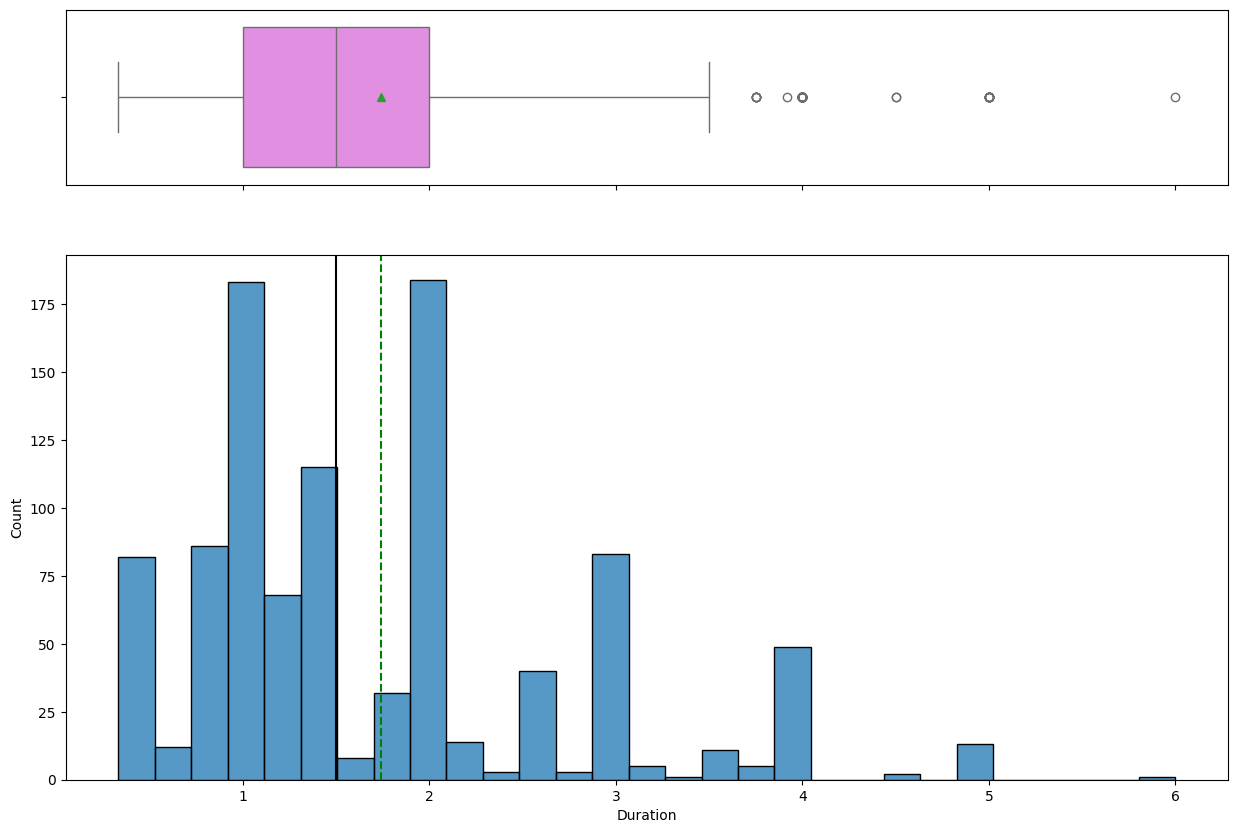

In [ ]:
histogram_boxplot(data, "Duration")

- The distribution of the duration for which the credit is given is right-skewed
- The boxplot shows that there are outliers at the right end
- We will not treat these outliers as they represent the real market trend

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Risk

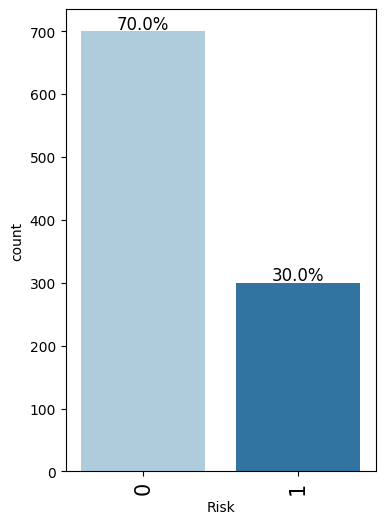

In [ ]:
labeled_barplot(data, "Risk", perc=True)

- As mentioned earlier, the class distribution in the target variable is imbalanced.
- We have 70% observations for non-defaulters and 30% observations for defaulters.

#### Observations on Sex of Customers

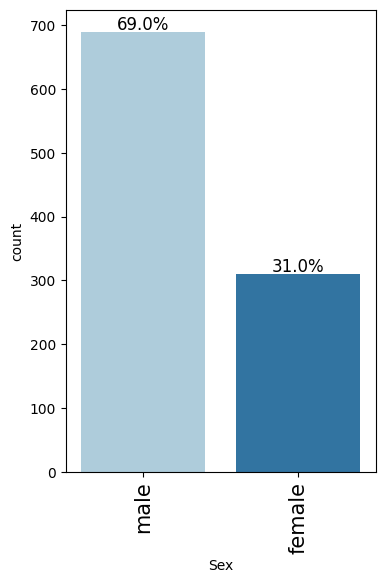

In [ ]:
labeled_barplot(data, "Sex", perc=True)

- Male customers are taking more credit than female customers
- There are 69% male customers and 31% female customers

#### Observations on Saving accounts

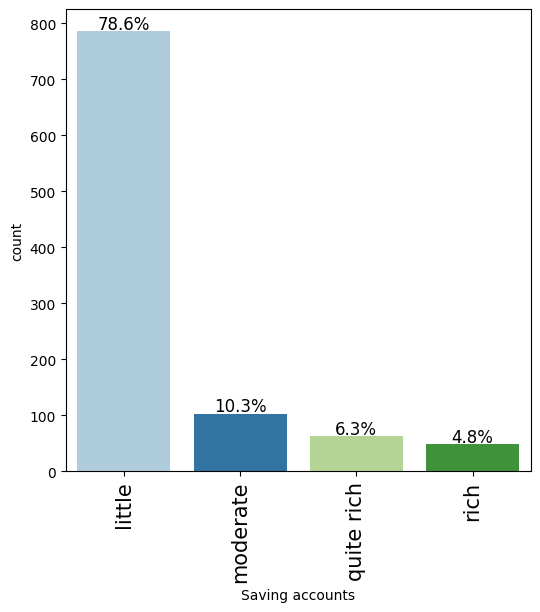

In [ ]:
labeled_barplot(data, "Saving accounts", perc=True)

- Approx 70% customers who take credit have a little or moderate amount in their savings account. This makes sense as these customers would need credit more than the other categories.
- Approx 11% customers who take credit are in the rich category based on their balance in the savings account.
- Note that the percentages do not add up to 100 as we have missing values in this column.

#### Observations on Checking account

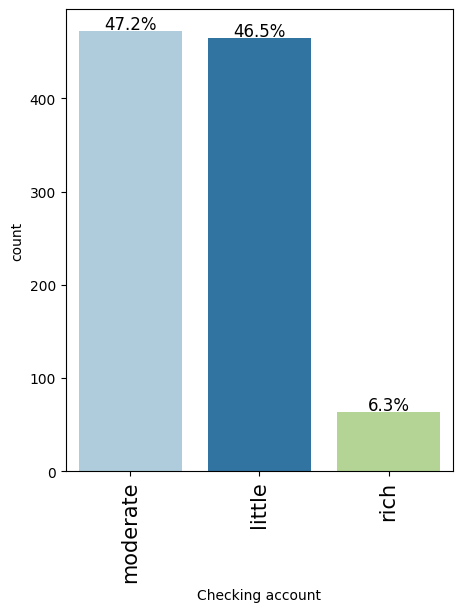

In [ ]:
labeled_barplot(data, "Checking account", perc=True)

- Approx 47% customers who take credit have a little or moderate amount in their checking account. This makes sense as these customers would need credit more than the other categories.
- Approx 6% customers who take credit are in the rich category based on their balance in the checking account.

#### Observations on Purpose

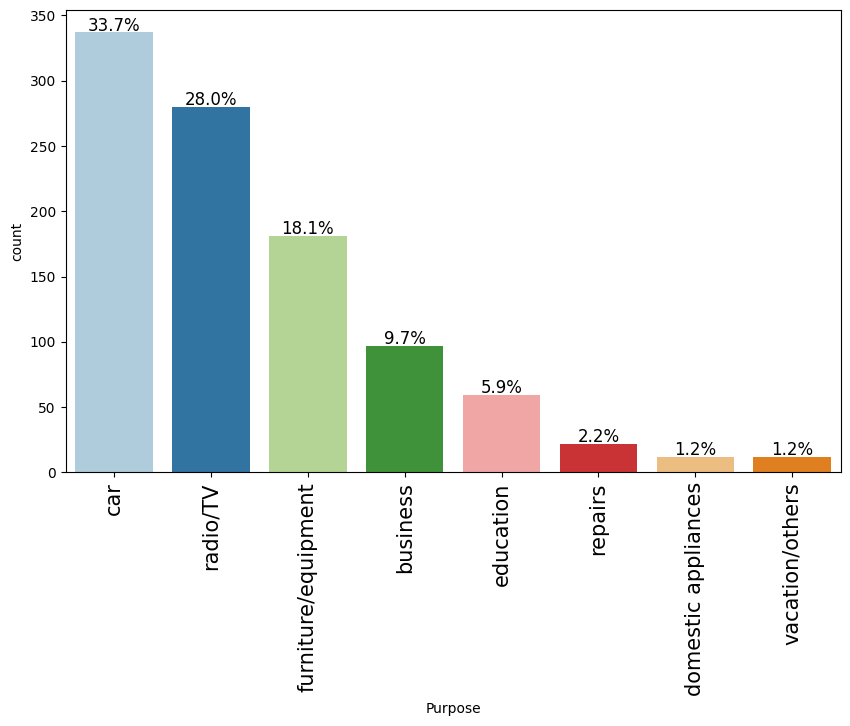

In [ ]:
labeled_barplot(data, "Purpose", perc=True)

- The plot shows that most customers take credit for luxury items like car, radio or furniture/equipment, domestic appliances.
- Approximately just 16% customers take credit for business or education

### Bivariate Analysis

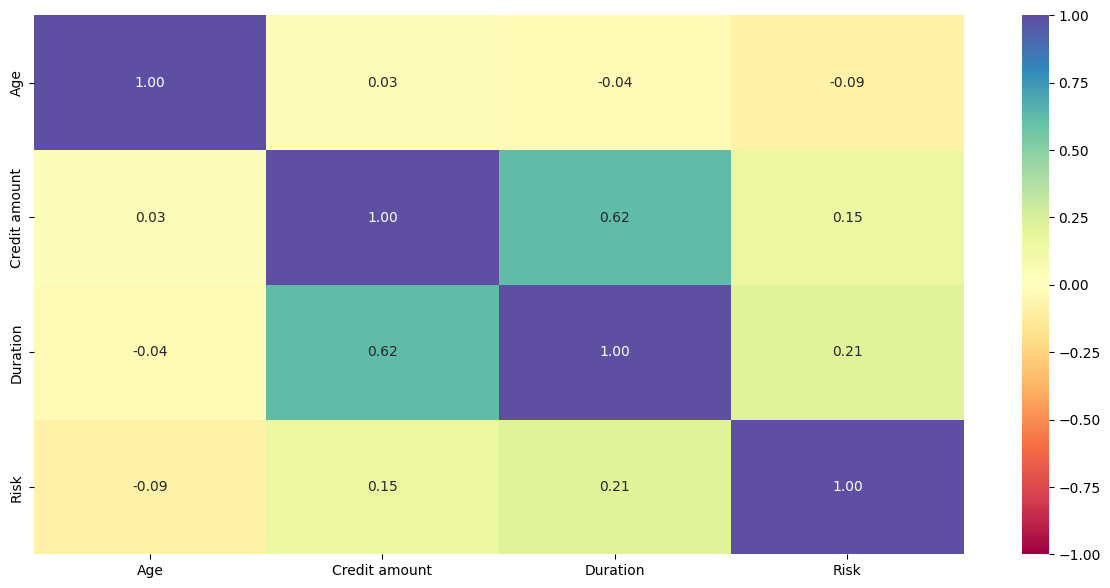

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Credit amount and duration have positive correlation which makes sense as customers might take the credit for longer duration if the amount of credit is high.
- Other variables have no significant correlation between them.

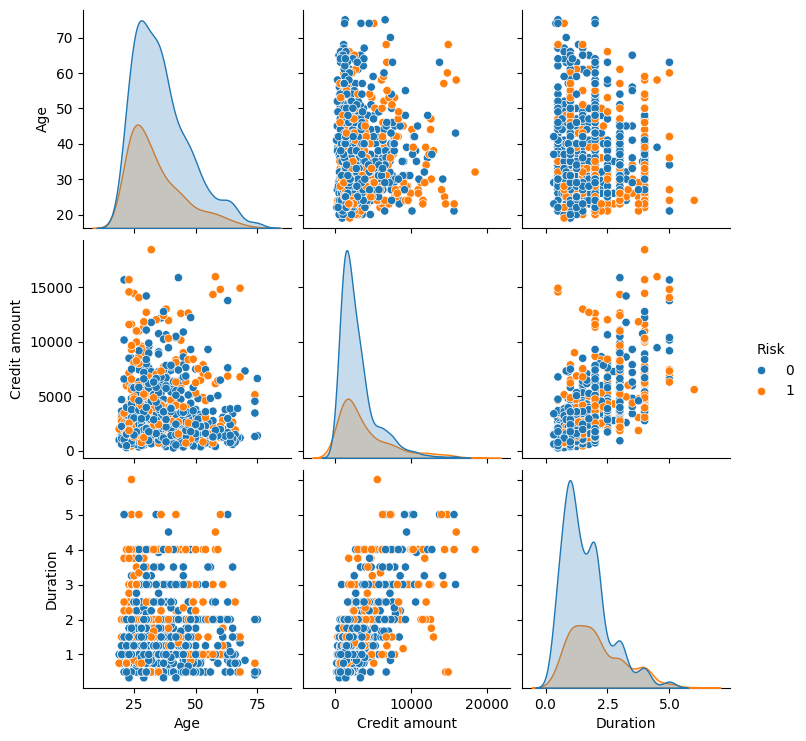

In [ ]:
sns.pairplot(data, hue="Risk")
plt.show()

- There are overlaps i.e., no clear distinction in the distribution of variables for people who have defaulted and did not default.
- Let's explore this further with the help of other plots.

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Risk vs Age

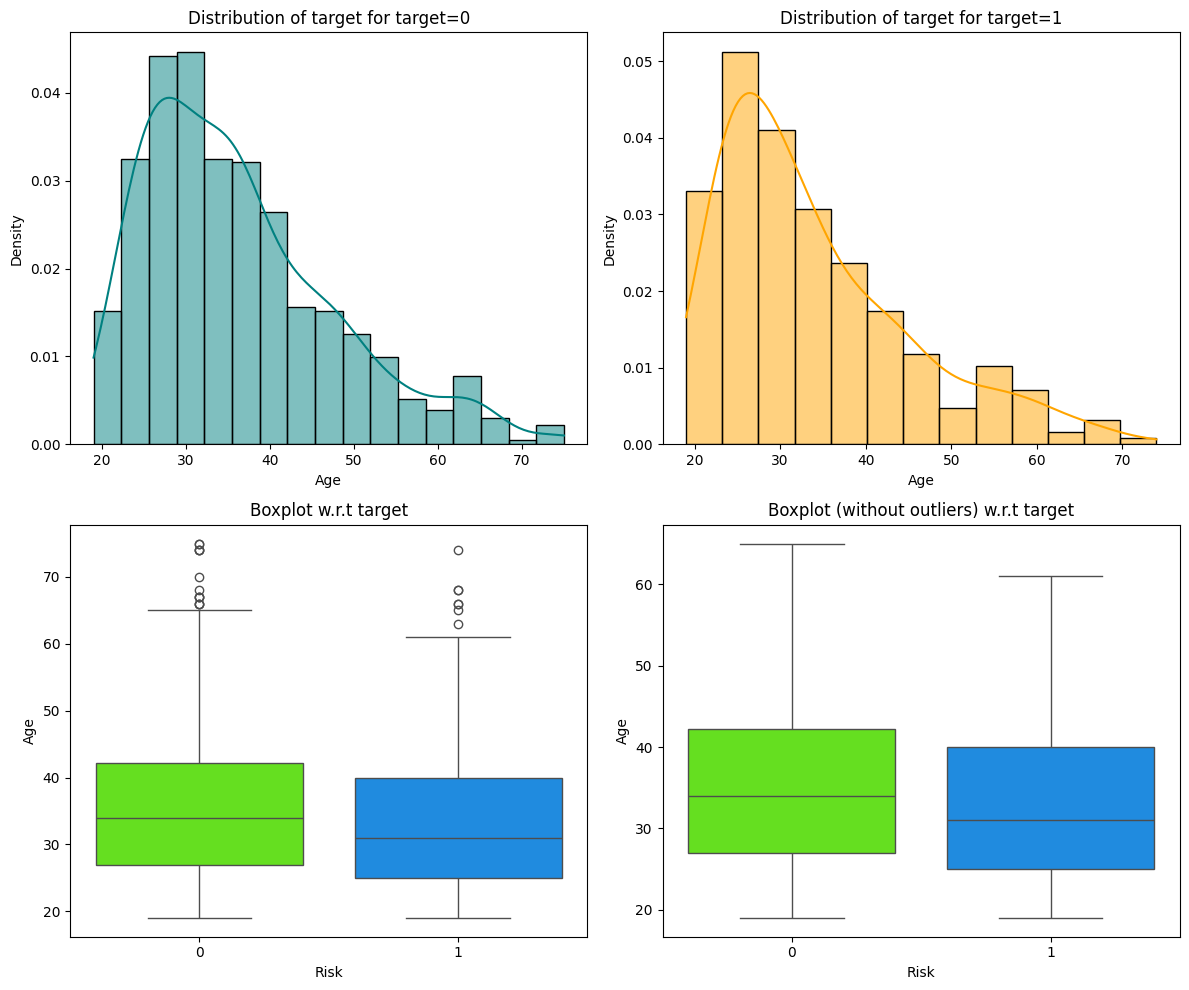

In [ ]:
distribution_plot_wrt_target(data, "Age", "Risk")

- We can see that the median age of defaulters is less than the median age of non-defaulters.
- This shows that younger customers are more likely to default.
- There are outliers in boxplots of both class distributions

#### Risk vs Credit amount

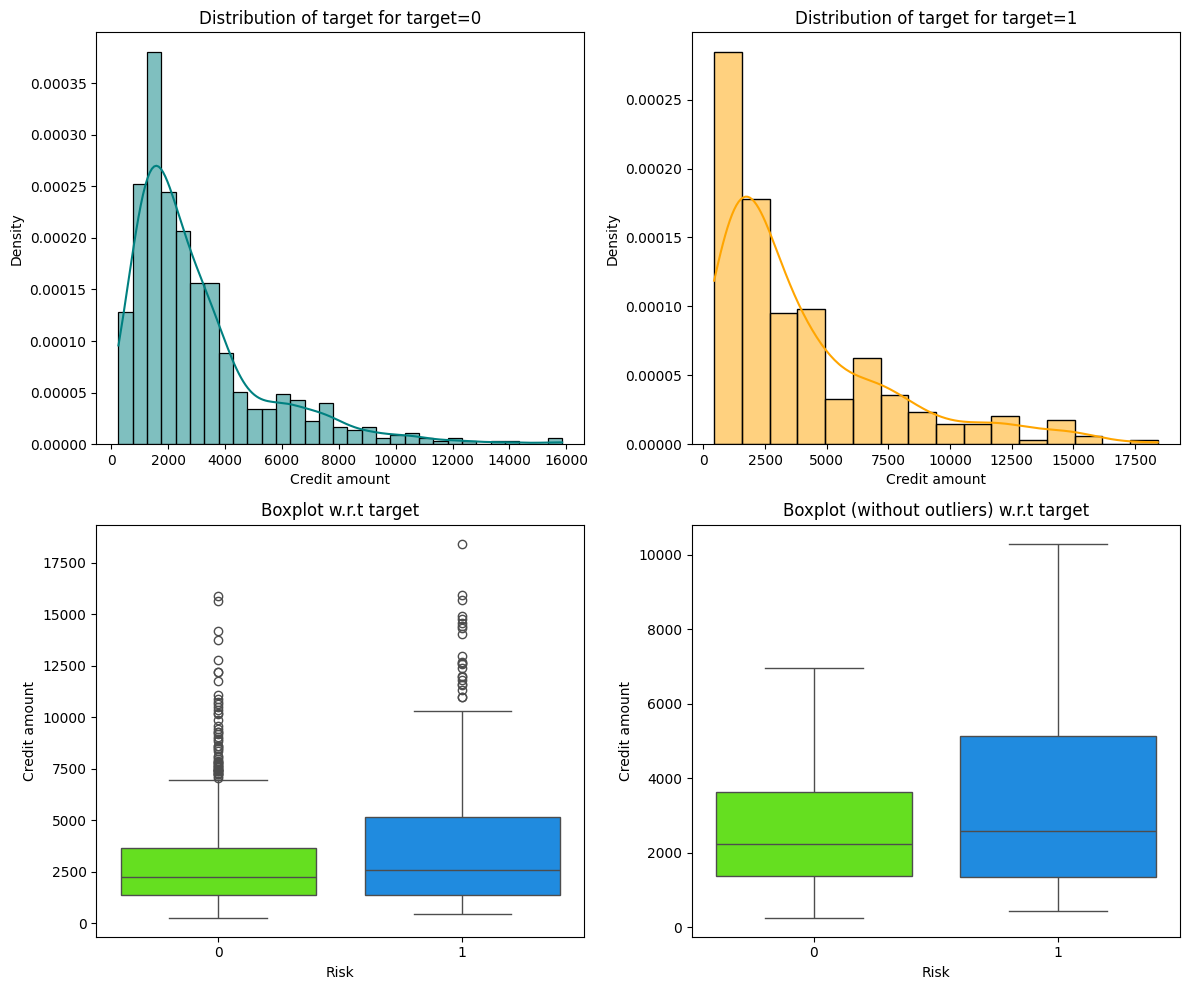

In [ ]:
distribution_plot_wrt_target(data, "Credit amount", "Risk")

- We can see that the third quartile amount of defaulters is much more than the third quartile amount of non-defaulters.
- This shows that customers with high credit amount are more likely to default.
- There are outliers in boxplots of both class distributions

#### Risk vs Duration

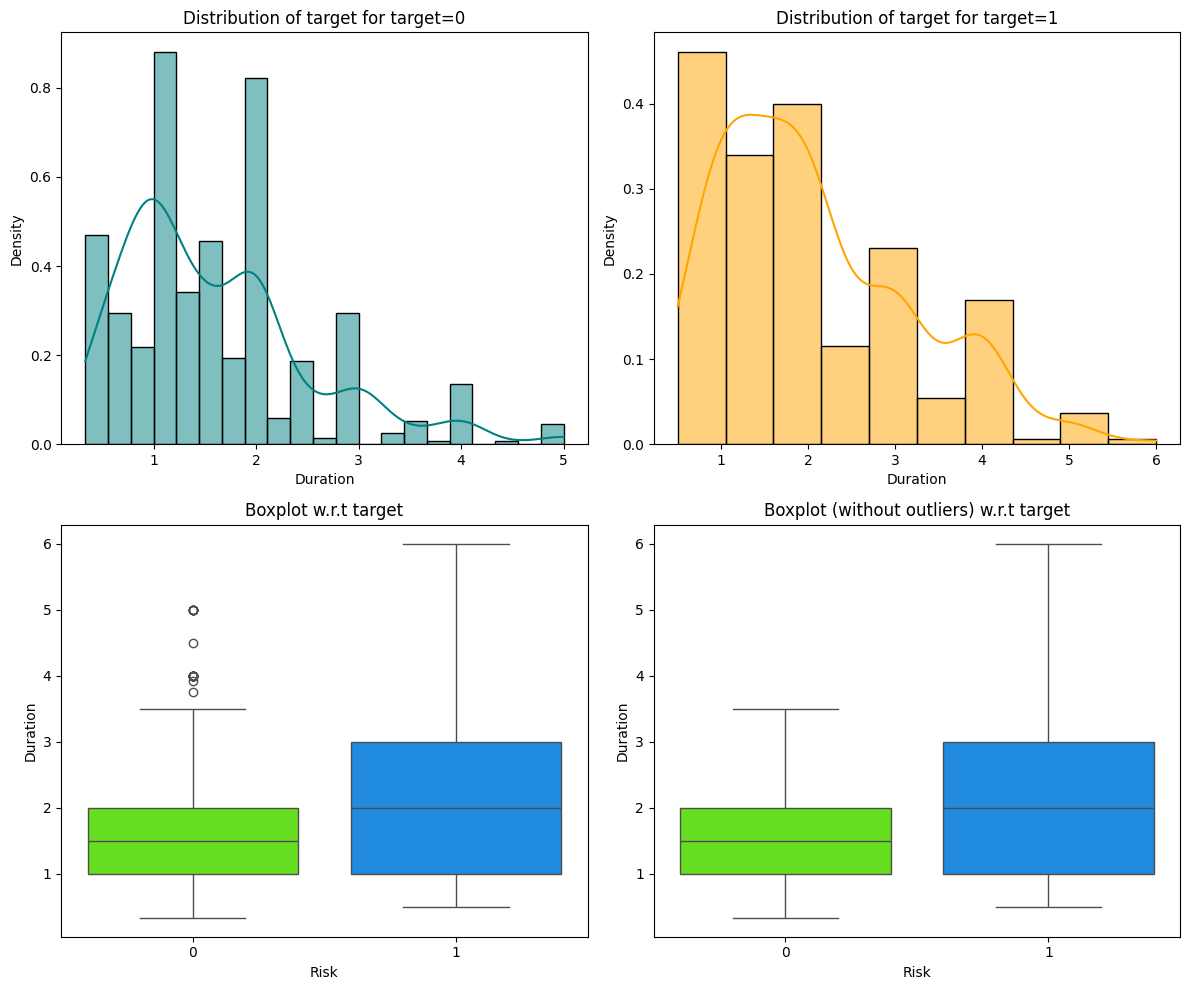

In [ ]:
distribution_plot_wrt_target(data, "Duration", "Risk")

- We can see that the second and third quartiles of duration of defaulters is much more than the second and third quartiles duration of non-defaulters.
- This shows that customers with high duration are more likely to default.

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Risk vs Sex

Risk      0    1   All
Sex                   
All     700  300  1000
male    499  191   690
female  201  109   310
------------------------------------------------------------------------------------------------------------------------


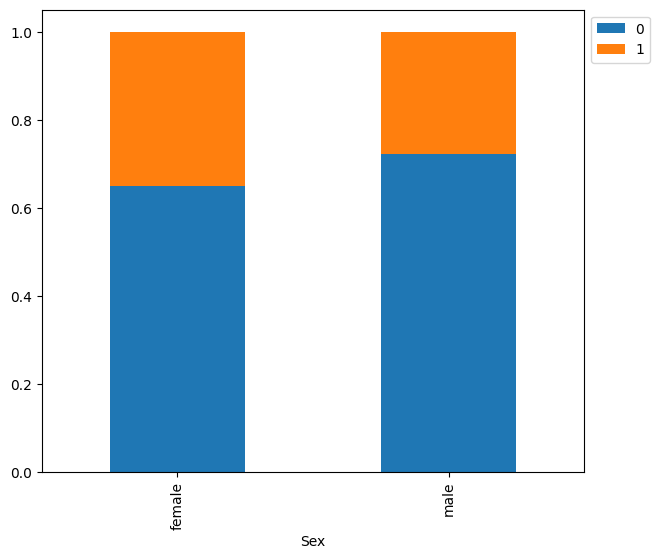

In [ ]:
stacked_barplot(data, "Sex", "Risk")

- We saw earlier that the percentage of male customers is more than the female customers. This plot shows that female customers are more likely to default as compared to male customers.

#### Risk vs Saving accounts

Risk               0    1   All
Saving accounts                
All              700  300  1000
little           537  249   786
moderate          69   34   103
quite rich        52   11    63
rich              42    6    48
------------------------------------------------------------------------------------------------------------------------


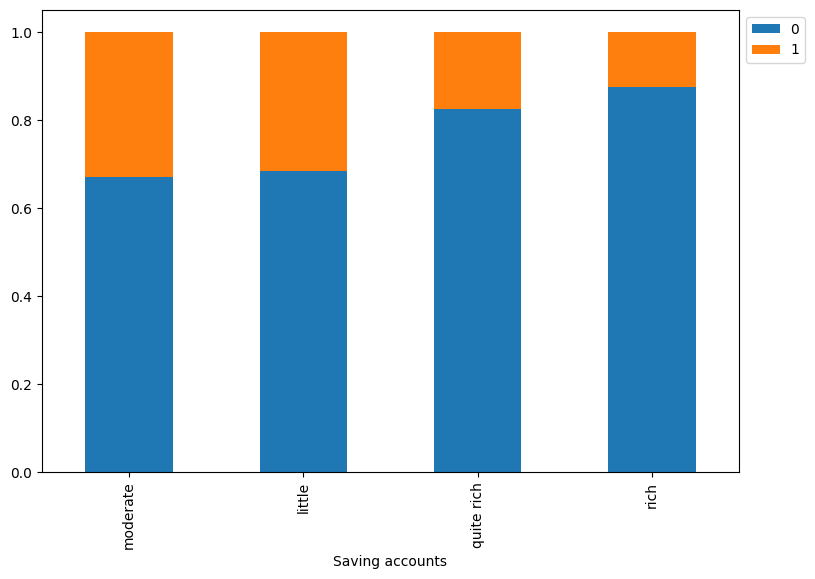

In [ ]:
stacked_barplot(data, "Saving accounts", "Risk")

- Customers with little or moderate amounts in saving accounts are more likely to default.
- Rich customers are slightly less likely to default as compared to quite rich customers

#### Risk vs Checking account

Risk                0    1   All
Checking account                
All               700  300  1000
little            304  161   465
moderate          347  125   472
rich               49   14    63
------------------------------------------------------------------------------------------------------------------------


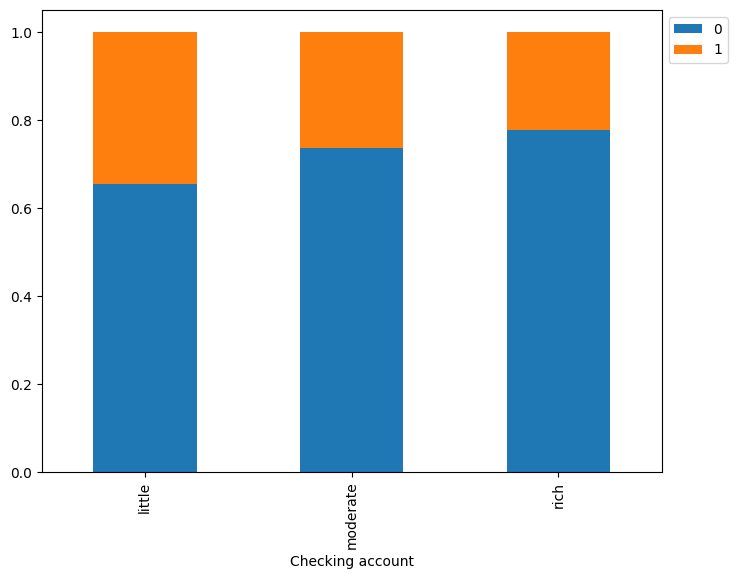

In [ ]:
stacked_barplot(data, "Checking account", "Risk")

- The plot further confirms the findings of the previous plot.
- Customers with little amount in checking accounts are most likely to default as compared to customers with moderate amount, which in turn, are more likely as compared to the rich customers.

#### Risk vs Purpose

Risk                   0    1   All
Purpose                            
All                  700  300  1000
car                  231  106   337
radio/TV             218   62   280
furniture/equipment  123   58   181
business              63   34    97
education             36   23    59
repairs               14    8    22
vacation/others        7    5    12
domestic appliances    8    4    12
------------------------------------------------------------------------------------------------------------------------


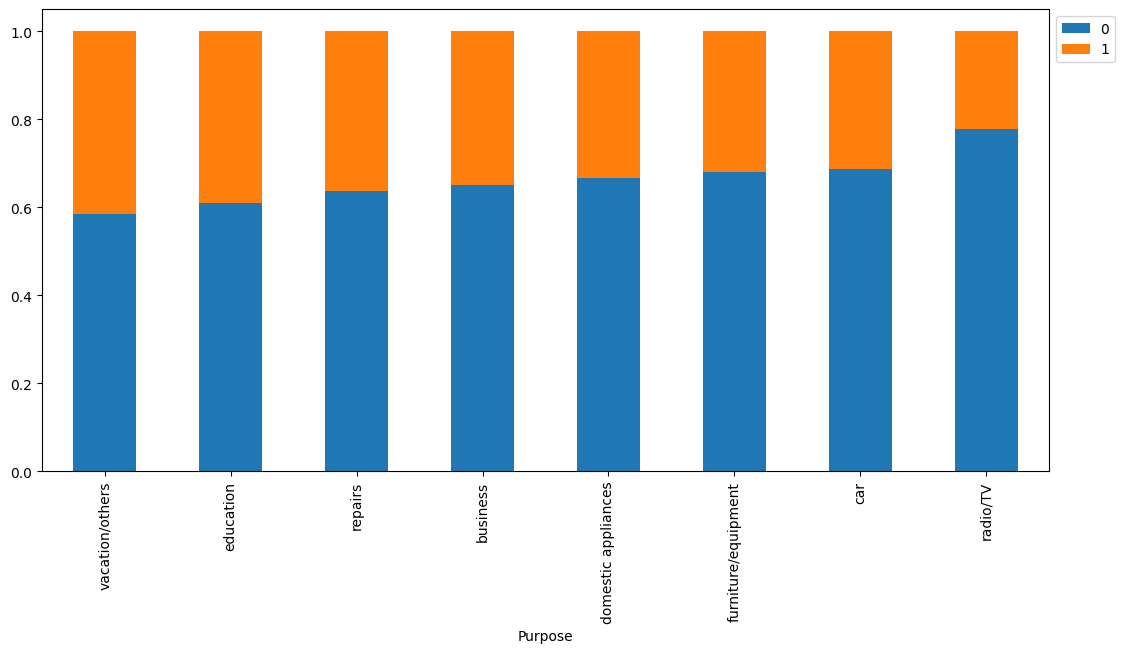

In [ ]:
stacked_barplot(data, "Purpose", "Risk")

- Customers who take credit for radio/TV are least likely to default. This might be because their credit amount is small.
- Customers who take credit for education or vacation are most likely to default.
- Other categories have no significant difference between their default and non-default ratio.

### To jump back to the EDA summary section, click <a href = #link2>here</a>.